C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.48


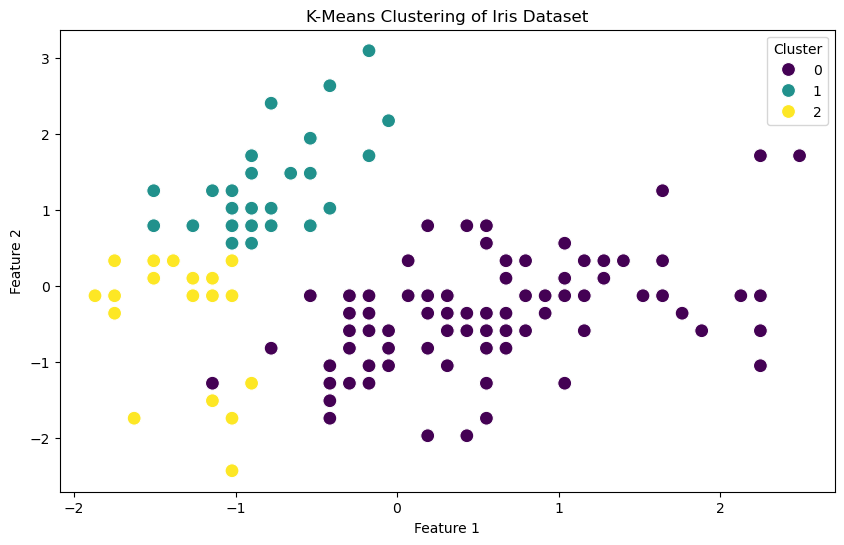

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


features = df.iloc[:, :-1]  
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)


labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')


plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=labels, palette='viridis', s=100)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()
